In [1]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.signal import stft, spectrogram #, welch : useless  
from sklearn.preprocessing import RobustScaler
from numpy.fft import rfft, irfft, rfftfreq
from scipy import fftpack
from scipy.io import loadmat

In [2]:
from os import listdir, path, walk, makedirs

In [3]:
def scaler(df):
    return RobustScaler().fit_transform(df)

In [6]:
import re

def tryint(s):
    try:
        return int(s)
    except:
        return s

def alphanum_key(s):
    """ Turn a string into a list of string and number chunks.
        "z23a" -> ["z", 23, "a"]
    """
    return [ tryint(c) for c in re.split('([0-9]+)', s) ]

def sort_nicely(l):
    """ Sort the given list in the way that humans expect.
    """
    l.sort(key=alphanum_key)

In [32]:
def eeg_to_images(subject=str):
    
    filelist = [i for i in listdir(subject) if 'preictal' in i]
    
    sort_nicely(filelist)
    
    for root, dirs, files in walk(f'./{subject}'):
        
        for i in filelist:
            c = 0 #counter to increment the filenames
            print(i)
            x = i.split('.')[0]
            temp = pd.read_csv(path.join(root, i))
            #temp = pd.DataFrame(scaler(temp))
            #print(temp)
            for j in range(temp.shape[0]):   #iterate through all sensors
                f, t, Sxx = spectrogram(temp.iloc[j], fs=50, nperseg=256)
                plt.imshow(Sxx[f<5,],aspect='auto',origin='lower',cmap='Greys_r')
                plt.axis('off')
                if not path.exists(path.join('preictal_images',f'sensor{j}')):
                        makedirs(path.join('preictal_images',f'sensor{j}'))
                
                plt.savefig(f'preictal_images/sensor{j}/{x}_{c}.png', bbox_inches='tight',pad_inches = 0)
                #print(variances.iloc[j])
            c += 1
    
    print("Done")

./Patient_1_csv
./Patient_1_csv/Patient_1_csv
preictal_segment_1.csv
preictal_segment_2.csv
preictal_segment_3.csv
preictal_segment_4.csv
preictal_segment_5.csv
preictal_segment_6.csv
preictal_segment_7.csv
preictal_segment_8.csv
preictal_segment_9.csv
preictal_segment_10.csv
preictal_segment_11.csv
preictal_segment_12.csv
preictal_segment_13.csv
preictal_segment_14.csv
preictal_segment_15.csv
preictal_segment_16.csv
preictal_segment_17.csv
preictal_segment_18.csv
Done


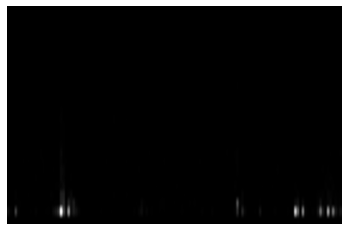

In [31]:
eeg_to_images('Patient_1_csv')